# Eksplorasi dan Pra-pemrosesan Data

Notebook ini fokus pada langkah-langkah awal dalam alur kerja machine learning: memuat dataset gambar, memvisualisasikan sampel untuk memahami data, dan menguji coba langkah-langkah prapemrosesan dasar seperti mengubah ukuran, konversi ke grayscale, dan normalisasi.

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.configs.config import DATA_RAW_PATH, CLASSES
from src.utils.dataset_loader import load_images_from_folder
from src.preprocessing.image_preprocessing import resize_image, to_grayscale, normalize_image

## Memuat Dataset

Menggunakan fungsi utilitas `load_images_from_folder` untuk memuat semua gambar beserta labelnya dari struktur direktori yang telah ditentukan.

In [2]:
# Memberi tau dari mana data dimuat
print(f"Mencari data di: {DATA_RAW_PATH}")

# Memanggil fungsi untuk memuat gambar, label, dan nama file
images, labels, filenames = load_images_from_folder(DATA_RAW_PATH)

# Menampilkan ringkasan data yang berhasil dimuat
print(f"\nTotal gambar yang dimuat: {len(images)}")
print(f"Total label: {len(labels)}")

2025-10-12 00:04:55,912 - INFO - dataset_loader - Memuat gambar dari 'd:\program\python-project\svm-models\build\data\raw'...


Mencari data di: d:\program\python-project\svm-models\build\data\raw


Loading Berkabut: 100%|██████████| 300/300 [00:02<00:00, 109.70it/s]
2025-10-12 00:05:06,677 - INFO - dataset_loader - Total gambar yang berhasil dimuat: 1200



Total gambar yang dimuat: 1200
Total label: 1200


## Visualisasi Sampel Gambar

Menampilkan beberapa gambar acak dari setiap kelas untuk verifikasi visual bahwa data telah dimuat dengan benar dan untuk mendapatkan gambaran tentang variasi dalam setiap kelas.

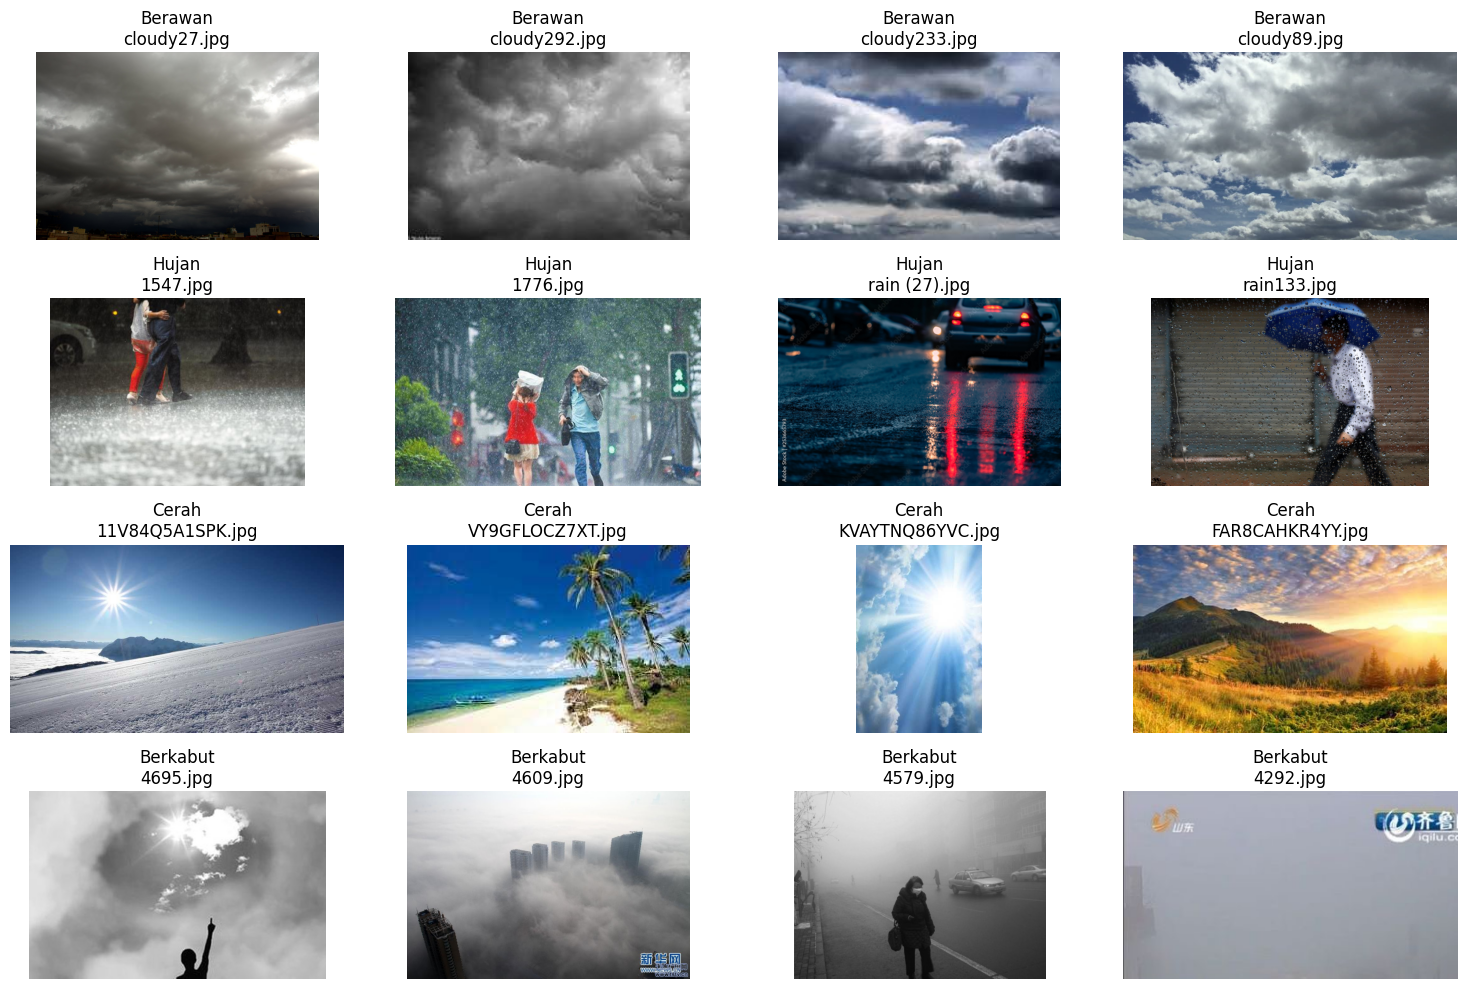

In [3]:
def show_sample_images(images, labels, num_samples=4):
    """Menampilkan beberapa gambar sampel dari setiap kelas.

    Args:
        images (list): Daftar gambar (array NumPy).
        labels (list): Daftar label integer yang sesuai.
        num_samples (int): Jumlah sampel yang akan ditampilkan per kelas.
    """
    plt.figure(figsize=(15, 10))
    
    # Iterasi melalui setiap kelas yang ada
    for i, class_name in enumerate(CLASSES):
        # Dapatkan semua indeks gambar yang termasuk dalam kelas saat ini
        class_indices = [idx for idx, label in enumerate(labels) if label == i]
        
        # Pilih beberapa indeks secara acak untuk ditampilkan
        if len(class_indices) > num_samples:
            sample_indices = random.sample(class_indices, num_samples)
        else:
            sample_indices = class_indices # Tampilkan semua jika kurang dari num_samples
            
        # Tampilkan setiap gambar sampel pada subplot
        for j, img_idx in enumerate(sample_indices):
            plt.subplot(len(CLASSES), num_samples, i * num_samples + j + 1)
            # Konversi dari BGR (OpenCV) ke RGB (Matplotlib) untuk tampilan yang benar
            img_rgb = cv2.cvtColor(images[img_idx], cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"{class_name}\n{filenames[img_idx]}")
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan sampel
show_sample_images(images, labels)

## Uji Coba Pra-pemrosesan

Mendemonstrasikan alur prapemrosesan pada satu gambar sampel: dari gambar asli, diubah ukurannya, diubah menjadi grayscale, hingga dinormalisasi. Ini membantu memvalidasi bahwa setiap fungsi prapemrosesan bekerja seperti yang diharapkan.

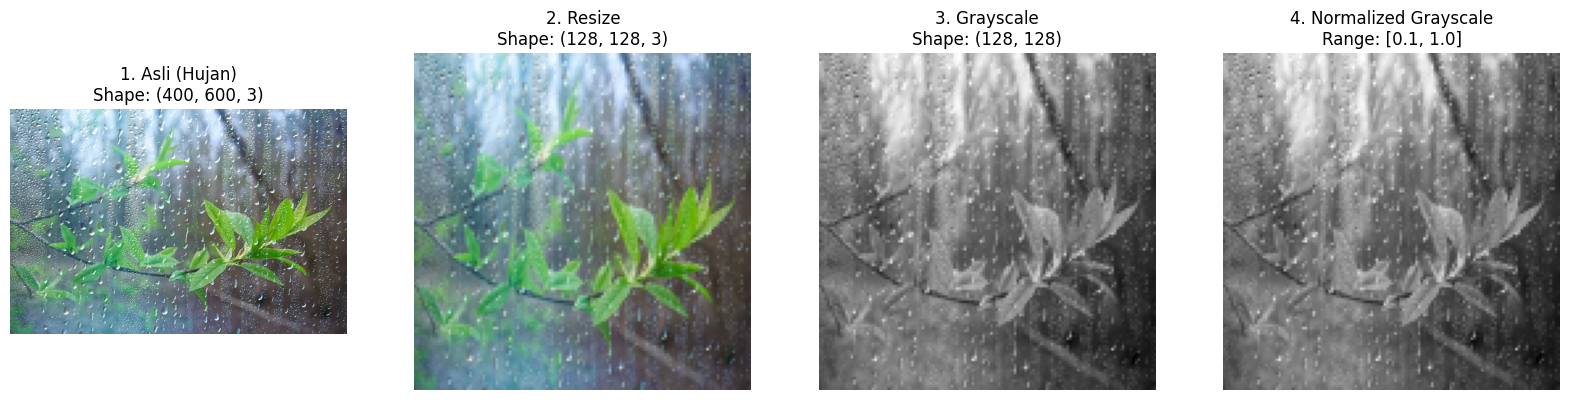

In [4]:
# Pilih satu gambar acak dari dataset untuk demonstrasi
sample_index = random.randint(0, len(images) - 1)
sample_image = images[sample_index]
sample_label = CLASSES[labels[sample_index]]

# Terapkan setiap langkah prapemrosesan secara berurutan
original_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
resized_img = resize_image(sample_image)
resized_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
gray_img = to_grayscale(resized_img)
normalized_gray = normalize_image(gray_img)

# Visualisasikan hasil dari setiap langkah dalam subplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 1. Gambar Asli
axes[0].imshow(original_rgb)
axes[0].set_title(f"1. Asli ({sample_label})\nShape: {sample_image.shape}")
axes[0].axis('off')

# 2. Setelah Resize
axes[1].imshow(resized_rgb)
axes[1].set_title(f"2. Resize\nShape: {resized_img.shape}")
axes[1].axis('off')

# 3. Setelah Konversi Grayscale
axes[2].imshow(gray_img, cmap='gray')
axes[2].set_title(f"3. Grayscale\nShape: {gray_img.shape}")
axes[2].axis('off')

# 4. Setelah Normalisasi
axes[3].imshow(normalized_gray, cmap='gray')
axes[3].set_title(f"4. Normalized Grayscale\nRange: [{normalized_gray.min():.1f}, {normalized_gray.max():.1f}]")
axes[3].axis('off')

plt.show()